In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
skeleton_img = cv2.imread('salt-and-pepper-Skeleton.png', cv2.IMREAD_GRAYSCALE)

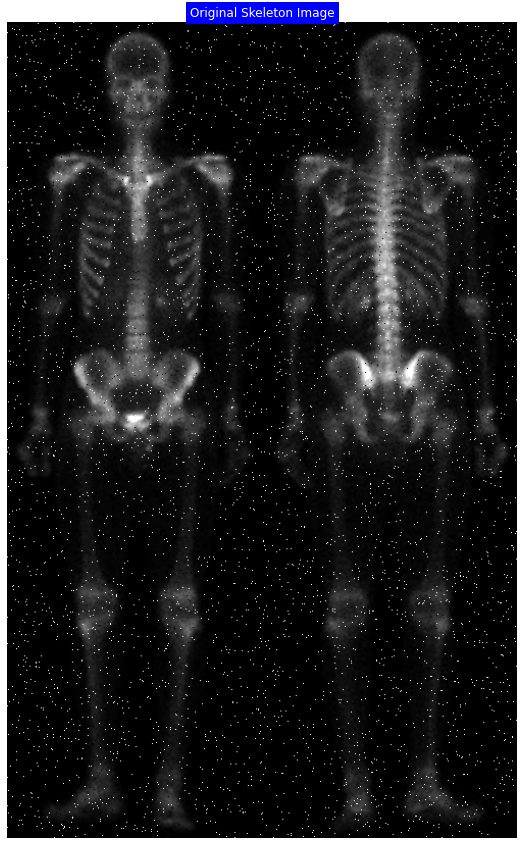

In [3]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Original Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(skeleton_img, cmap = 'gray', vmin=0, vmax=2**(skeleton_img.itemsize*8)-1)

### 1. Eliminate noise

#### The noise can be eliminated by applying median filter

In [4]:
median_filtered_img = cv2.medianBlur(skeleton_img, 3)

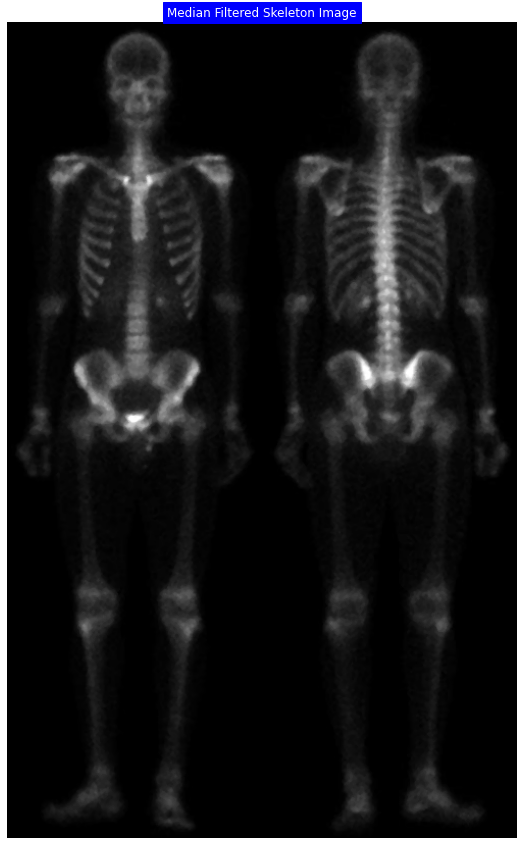

In [5]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(median_filtered_img, cmap = 'gray', vmin=0, vmax=2**(median_filtered_img.itemsize*8)-1)

### 2. 

In [316]:
def perform_correlation(img, kernel):
    pad = int((kernel.shape[0] - 1)/2)
    padded_img = np.pad(img, pad, mode = 'edge')
    corr_img = np.zeros(img.shape, dtype=np.float64)
    x_radius, y_radius = (kernel.shape[0] - 1) // 2, (kernel.shape[1] - 1) // 2
    # apply kernel
    for i in range(x_radius, padded_img.shape[0] - x_radius):
        for j in range(y_radius, padded_img.shape[1] - y_radius):
            covered_area = padded_img[i-x_radius:i+x_radius+1, j-y_radius:j+y_radius+1]
            corr_img[i-x_radius, j-y_radius] = np.sum(np.multiply(covered_area, kernel))
    return corr_img

In [325]:
# Sharpen
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# ddepth = -1, so the result (destination) image will have the same depth as the input (source) image.
sharpened_img = cv2.filter2D(src=median_filtered_img, ddepth=-1, kernel=kernel)

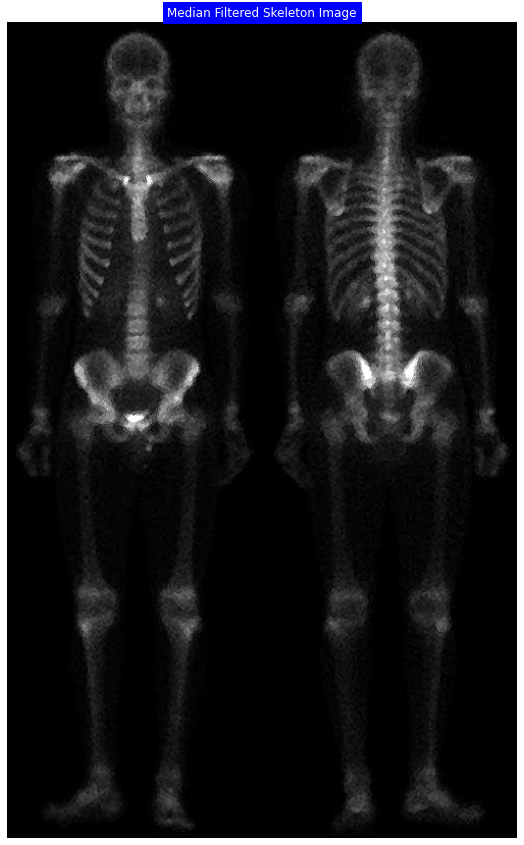

In [326]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sharpened_img, cmap = 'gray', vmin=0, vmax=2**(sharpened_img.itemsize*8)-1)

In [329]:
# Laplacian
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

laplacian_img =  perform_correlation(median_filtered_img, kernel)
# normalize intensity values by mapping the most negative value to zero and shift the rest based on it
lap_normalized = (laplacian_img - np.min(laplacian_img)) / (np.max(laplacian_img) - np.min(laplacian_img)) * 255
laplacian_img = lap_normalized.astype(np.uint8)

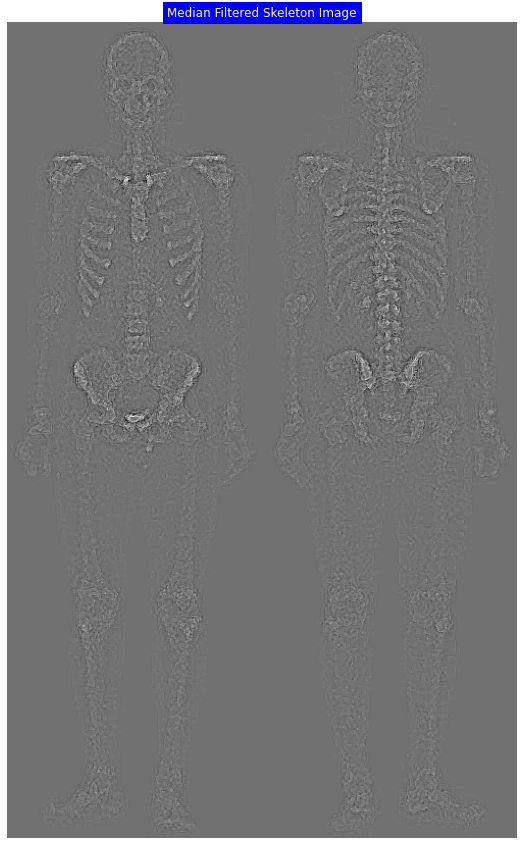

In [330]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(laplacian_img, cmap = 'gray', vmin=0, vmax=2**(laplacian_img.itemsize*8)-1)

In [331]:
# sobel x
kernel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

In [332]:
sobelx = cv2.Sobel(median_filtered_img, -1, dx=1, dy=0, ksize=3)  # x

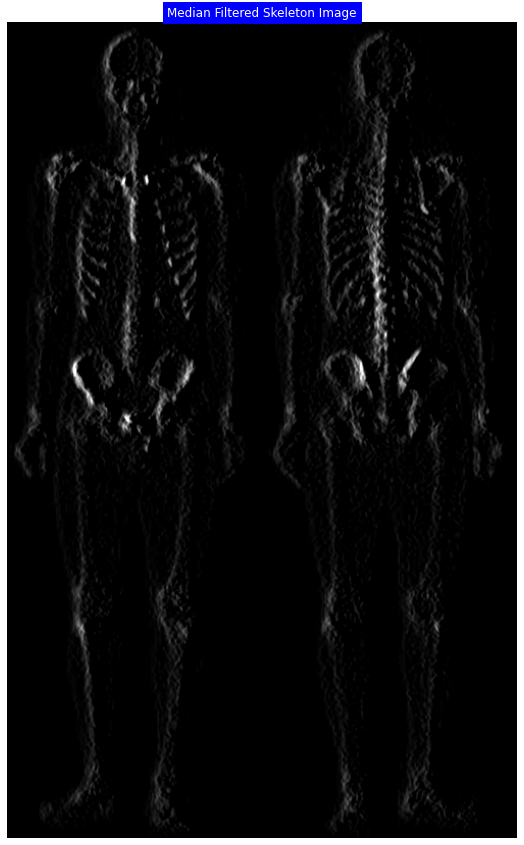

In [333]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sobelx, cmap = 'gray', vmin=0, vmax=2**(sobelx.itemsize*8)-1)

### 3.

In [334]:
sobely = cv2.Sobel(src=median_filtered_img, ddepth=-1, dx=0, dy=1, ksize=3)

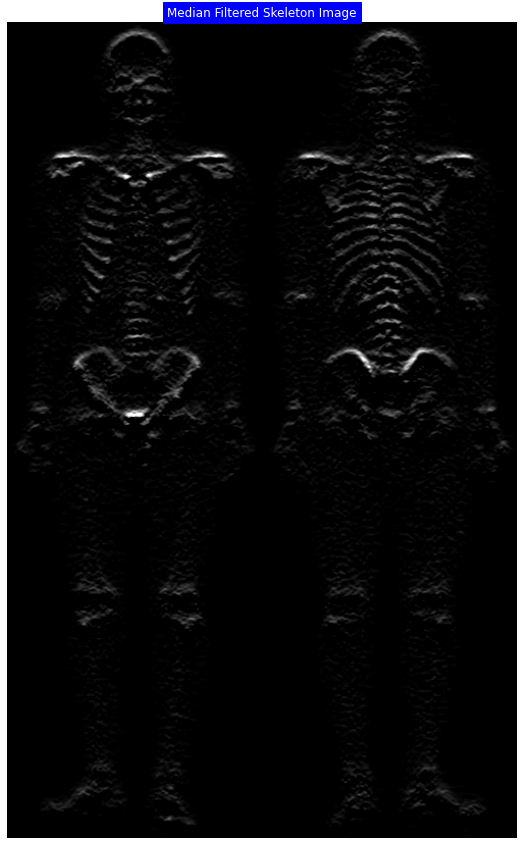

In [335]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sobely, cmap = 'gray', vmin=0, vmax=2**(sobely.itemsize*8)-1)

### 4.

In [336]:
def power_law(_img, gamma, _plot=True):
    n_bytes = _img.itemsize
    c = (2**(n_bytes*8)-1)**(1-gamma)
    transformed_img = np.zeros(shape=_img.shape, dtype=_img.dtype)
    # Perform power law
    transformed_img = (c*(_img)**gamma).astype(_img.dtype)
    return transformed_img

In [337]:
dst = power_law(median_filtered_img, 0.5)

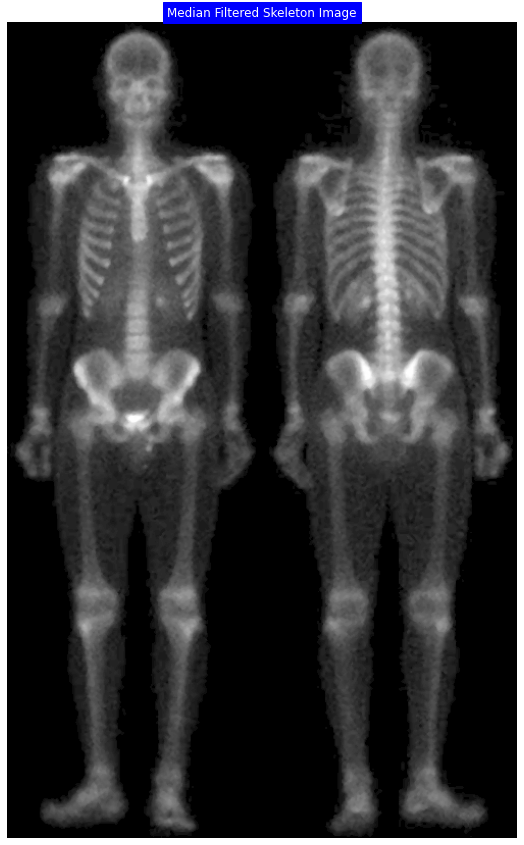

In [338]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(dst, cmap = 'gray', vmin=0, vmax=2**(dst.itemsize*8)-1)